In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import scipy as scp
import os

np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


In [0]:
#Prepare to read Data from Google Sheets
!pip install --upgrade -q gspread

In [0]:
#Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

### Part 1:
### Explorative data analysis


In [0]:
#Read Google Spreadsheet as CSV into pandas DataFrame
import pandas as pd
athletes = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSJVttSIzZG9lGnMk6xWeUTIQPBIXD7hvysGSHjsgiCs5DWnZVgeJM9k6EFWWm5l9blPsK_8UY-janF/pub?gid=0&single=true&output=csv')

In [0]:
athletes.describe()

,Skills,Height (cm),Weight (kg),BMI
count,1480.000000,1480.000000,1480.000000,1480.000000
mean,-59.003378,179.994595,74.204054,22.639189
std,966.432367,12.506224,17.029235,2.927491
min,-1373.000000,146.000000,43.000000,15.000000
25%,-517.000000,171.000000,62.000000,21.000000
50%,-292.000000,178.000000,69.000000,22.000000
75%,-27.750000,188.000000,84.000000,24.000000
max,8441.000000,231.000000,180.000000,66.000000


In [0]:
athletes["Sport"].value_counts()

Tennis          614
Basketball      358
Swimming        183
Judo             95
Football         81
Baseball         47
Cycling          36
Table Tennis     33
Golf             19
Equestrian       14
Name: Sport, dtype: int64

In [0]:
athletes["Gender"].value_counts()

Female    917
Male      563
Name: Gender, dtype: int64

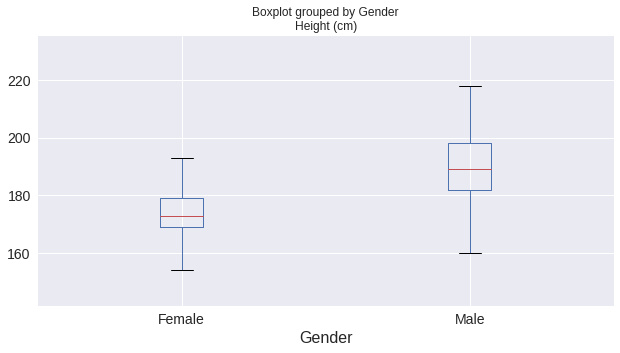

In [0]:
athletes.boxplot(column='Height (cm)', by='Gender',figsize=(10,5))

In [0]:
athletes["Nationality"].value_counts()

USA                       463
Spain                      86
Russia                     83
Australia                  75
Italy                      64
France                     60
Germany                    58
Japan                      53
China                      36
Czech Republic             32
Netherlands                29
Canada                     26
UK                         24
Romania                    19
Ukraine                    19
Switzerland                15
Brazil                     15
Hungary                    15
Slovakia                   15
Austria                    15
Belarus                    14
Argentina                  13
Serbia                     13
Croatia                    13
South Africa               11
Belgium                    11
Poland                     11
Kazakhstan                 11
Slovenia                   11
Soviet Union               10
                         ... 
Thailand                    3
Uruguay                     2
Albania   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa15e084a50>,
      dtype=object)

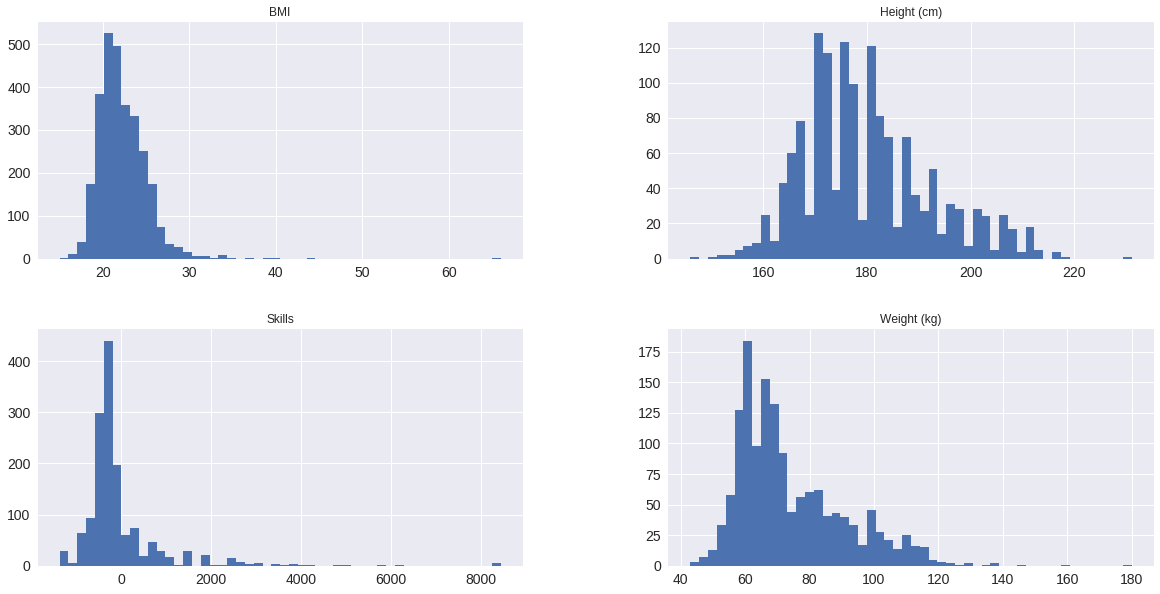

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
athletes.hist(bins=50, figsize=(20,10))

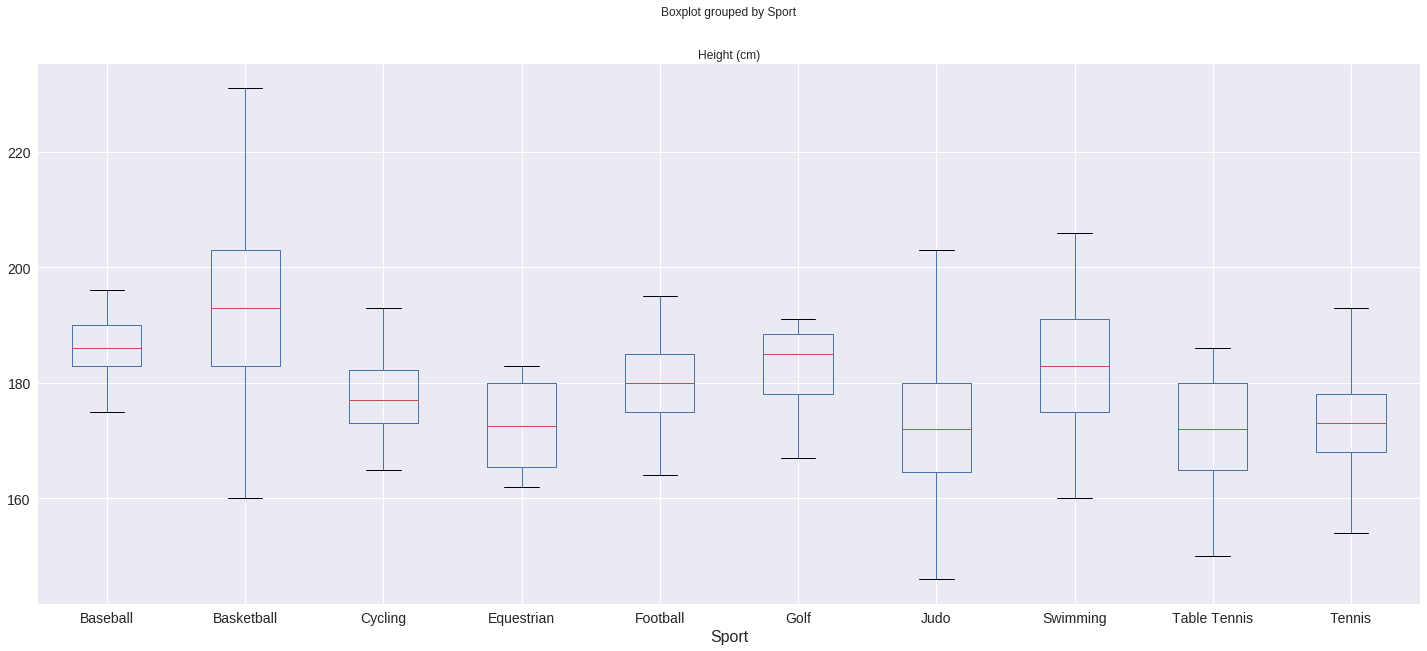

In [0]:
athletes.boxplot(column='Height (cm)', by='Sport',figsize=(24,10))

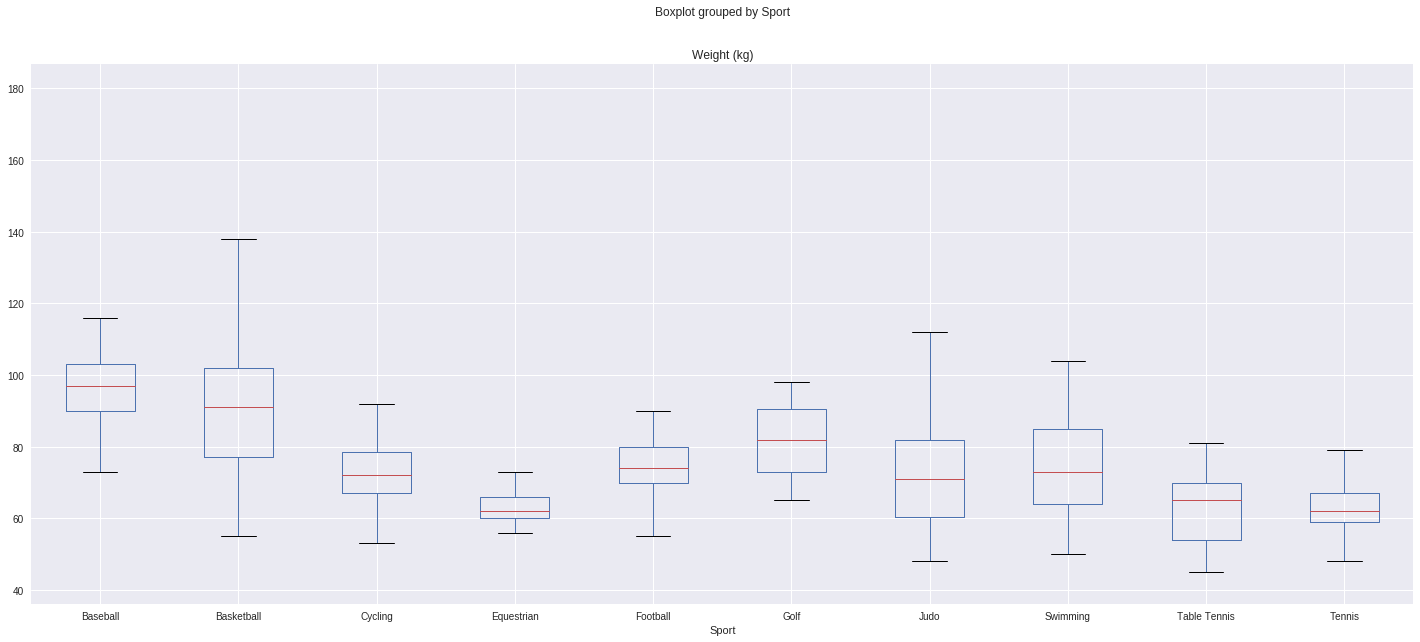

In [0]:
athletes.boxplot(column='Weight (kg)', by='Sport',figsize=(24,10))

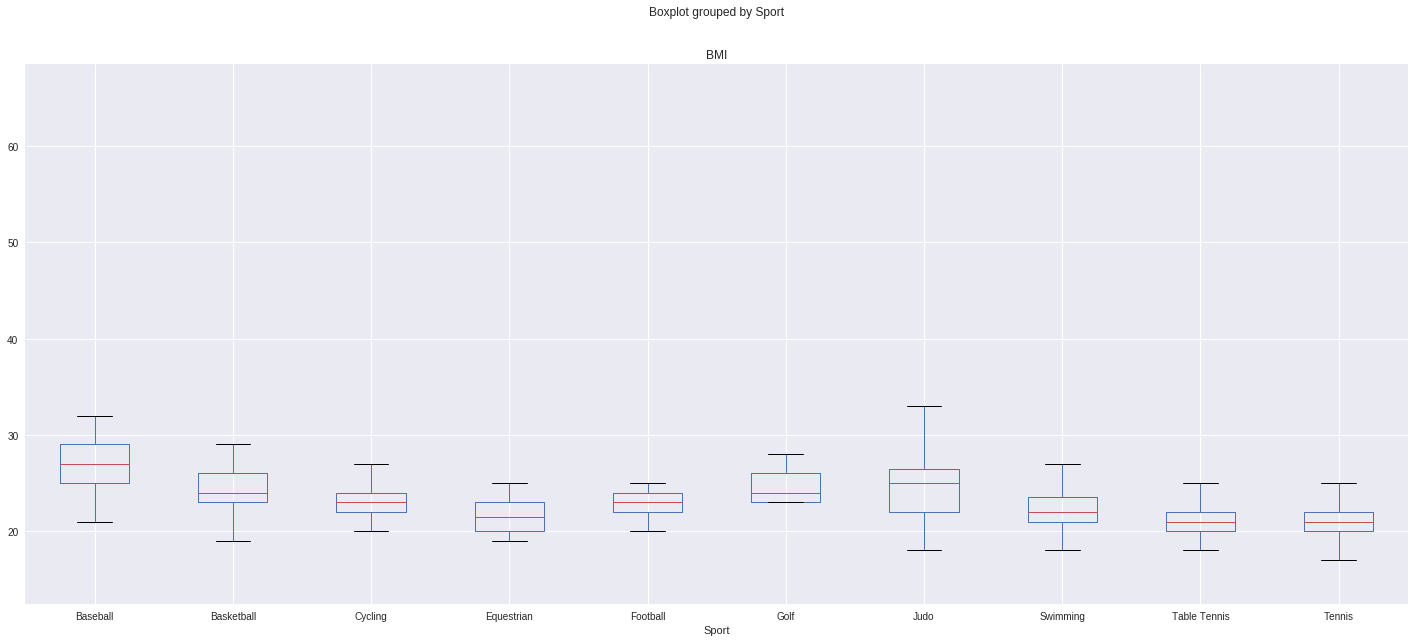

In [0]:
athletes.boxplot(column='BMI', by='Sport',figsize=(24,10))

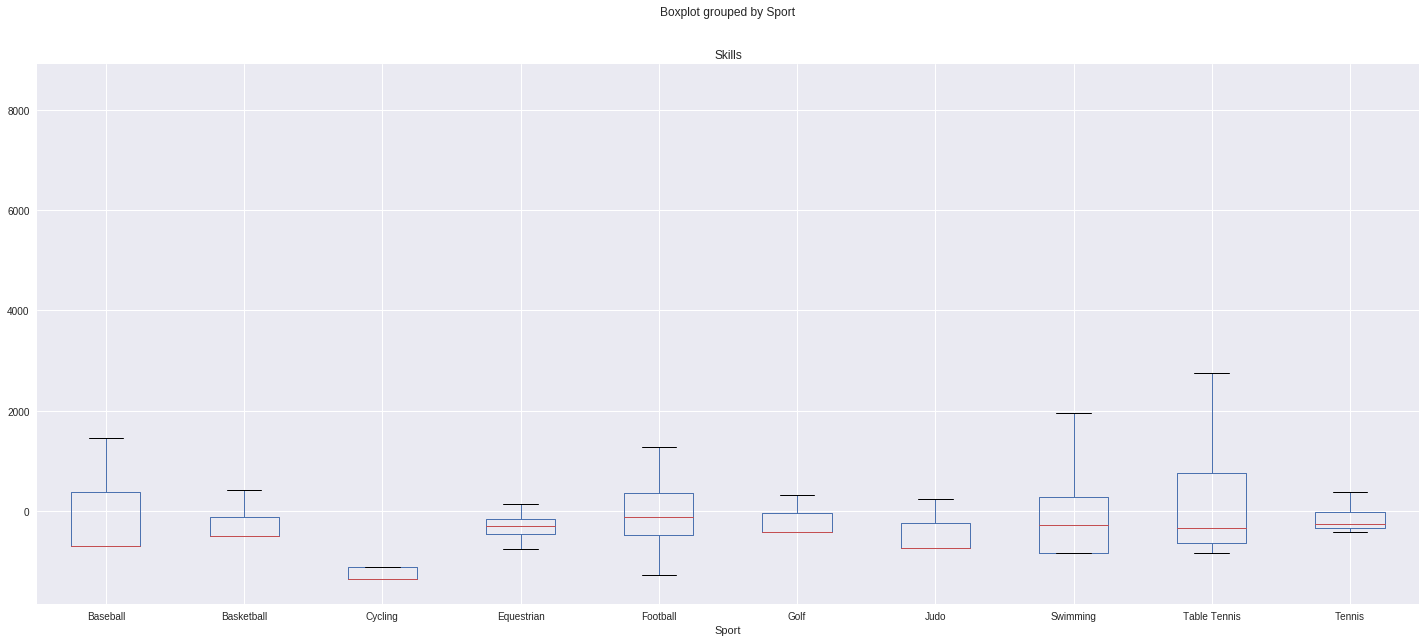

In [0]:
athletes.boxplot(column='Skills', by='Sport',figsize=(24,10))

In [0]:
corr_matrix = athletes.corr()

In [0]:
corr_matrix["Height (cm)"].sort_values(ascending=False)

Height (cm)    1.000000
Weight (kg)    0.858799
BMI            0.392180
Skills         0.050477
Name: Height (cm), dtype: float64

In [0]:
corr_matrix["Weight (kg)"].sort_values(ascending=False)

Weight (kg)    1.000000
Height (cm)    0.858799
BMI            0.798210
Skills         0.031128
Name: Weight (kg), dtype: float64

In [0]:
corr_matrix["BMI"].sort_values(ascending=False)

BMI            1.00000
Weight (kg)    0.79821
Height (cm)    0.39218
Skills        -0.00625
Name: BMI, dtype: float64

No clear notion in the correlations and the graph below, meaning height, weight and BMI have no effect on skill-level across sports.

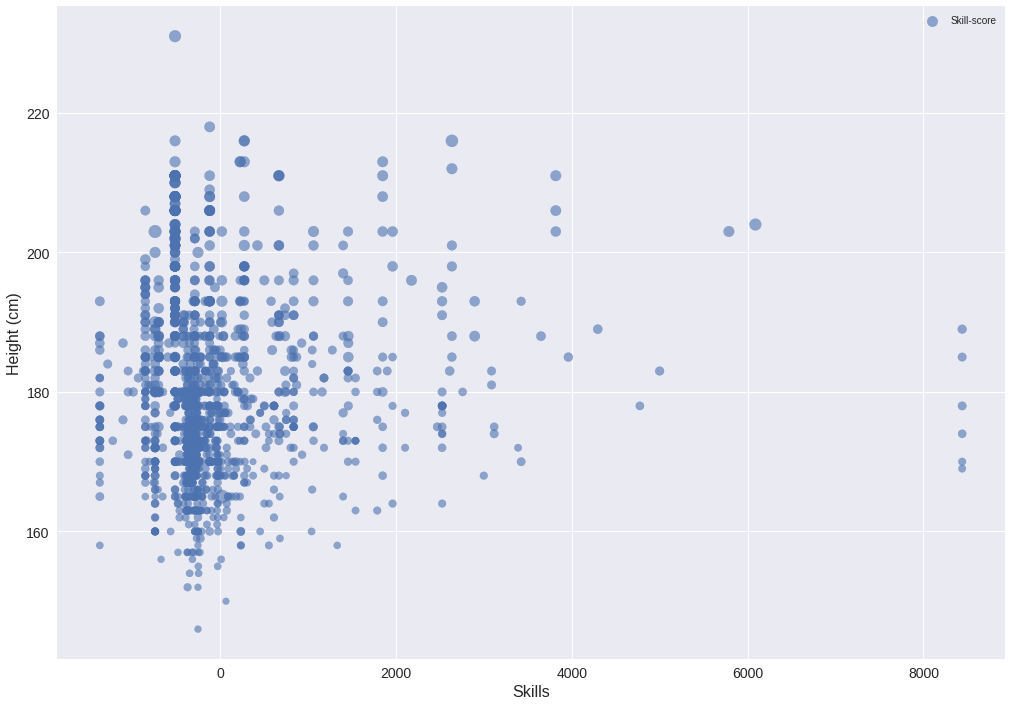

In [0]:
athletes.plot(kind="scatter", x="Skills", y="Height (cm)", figsize=(17,12), alpha=0.6,
          s=athletes["Weight (kg)"], label="Skill-score",
          sharex=False)

In [0]:
athletes_age = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQqAmi6GcqnF58z0WS4B63A0Xe1EfrTkpT4uP-1XER_mgD0JoDfnbWsUtExuxD7spl9s9ef0xgfZHlz/pub?output=csv')


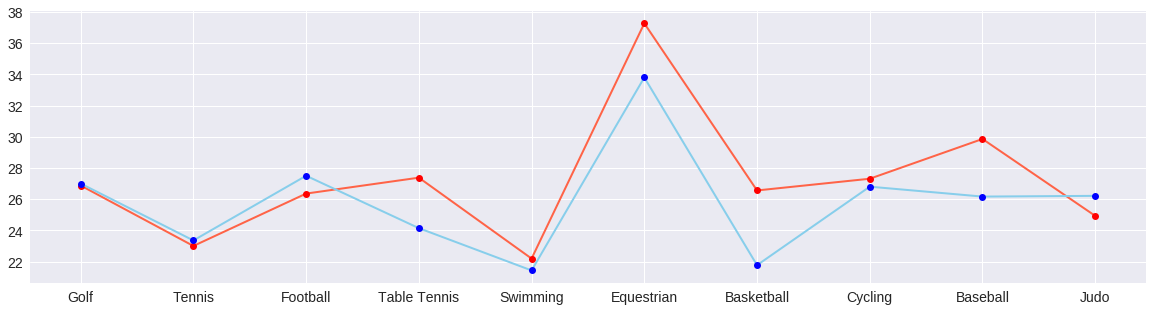

In [0]:

 
# Male vs Female among sports
plt.figure(figsize=(20,5))

plt.plot( 'Sport', 'Avg_peak_age male', data=athletes_age, marker='o', markerfacecolor='red', color='tomato', linewidth=2)
plt.plot( 'Sport', 'Avg_peak_age female', data=athletes_age, marker='o',  markerfacecolor='blue', color='skyblue', linewidth=2)


In [0]:
countries = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSQBwLZN6HOR0Y95aOL2WlWJ7viXN8mXqIrAuqWruQ-MfF77BkiIlJ8Us_sl-heP1unkkZweCR59KGq/pub?gid=1486598635&single=true&output=csv')

In [0]:
countries['athletes_per_capita']= (countries['Total_Athletes'] / countries['population'])
countries.head(10)

,country,avg_weight,avg_height,population,life_expectancy,HDI,Total_Athletes,footballplayers,tennisplayers,tabletennisplayers,...,fieldhockey,volleyballs,handballs,badmintons,boxers,lacrosses,ice_hockeys,rugbys,aFootball,athletes_per_capita
0,Afghanistan,69,176,31822848,64,335.0,8472,3096,24,0,...,744,24,0,72,168,0,0,0,0,0.000266
1,Albania,78,181,3020209,78,764.0,1218,1132,9,0,...,0,7,0,0,13,0,0,0,0,0.000403
2,Algeria,75,176,38813722,76,577.0,38220,28054,416,26,...,0,1690,1716,286,1170,0,156,0,0,0.000985
3,Angola,85,186,21471618,62,382.0,6290,3162,0,0,...,0,0,1156,0,51,0,0,0,17,0.000293
4,Antigua and Barbuda,81,186,100963,76,773.0,968,448,0,0,...,0,0,0,0,0,0,0,0,0,0.009588
5,Argentina,79,177,43417000,77,705.0,229554,182416,5200,156,...,4498,4186,1742,1560,4758,0,78,364,52,0.005287
6,Armenia,80,172,2976566,75,743.0,450,307,7,2,...,1,0,0,51,47,0,2,0,0,0.000151
7,Australia,86,167,23401892,82,939.0,9508,1599,542,31,...,272,84,36,299,211,6,107,28,17,0.000406
8,Austria,81,180,8572895,81,885.0,4035,2224,119,74,...,2,44,230,317,62,0,291,0,6,0.000471
9,Azerbaijan,78,155,9416801,72,751.0,607,410,4,0,...,0,32,5,46,35,0,0,0,0,0.000064


In [0]:
corr_matrix = countries.corr()
corr_matrix["life_expectancy"].sort_values(ascending=False)

life_expectancy        1.000000
HDI                    0.844005
swimmers               0.228345
cyclists               0.217911
ice_hockeys            0.210216
tabletennisplayers     0.199219
volleyballs            0.184220
handballs              0.161369
Total_Athletes         0.160814
badmintons             0.157009
tennisplayers          0.153998
judokas                0.152929
basketballs            0.149950
boxers                 0.143692
footballplayers        0.135779
jockeys                0.123034
golf                   0.120577
rugbys                 0.119921
baseballs              0.116251
athletes_per_capita    0.110823
lacrosses              0.108273
fieldhockey            0.082429
avg_height             0.076620
cricketers             0.066138
aFootball              0.052186
avg_weight             0.001909
population            -0.017208
Name: life_expectancy, dtype: float64

In [0]:
corr_matrix = countries.corr()
corr_matrix["HDI"].sort_values(ascending=False)

HDI                    1.000000
life_expectancy        0.844005
ice_hockeys            0.269486
swimmers               0.183421
cyclists               0.175323
handballs              0.160507
basketballs            0.160157
lacrosses              0.150222
tabletennisplayers     0.147111
athletes_per_capita    0.132056
volleyballs            0.125265
rugbys                 0.124264
avg_height             0.122865
tennisplayers          0.122864
golf                   0.119811
aFootball              0.112538
Total_Athletes         0.106439
baseballs              0.090236
boxers                 0.088016
jockeys                0.086234
avg_weight             0.080458
footballplayers        0.080032
judokas                0.073411
badmintons             0.053287
fieldhockey            0.036864
cricketers             0.018327
population            -0.099946
Name: HDI, dtype: float64



```
# This is formatted as code
```
# Part 2:
## Machine Learning: Regression analysis
### Only those regression are displayed which show interesting results.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes.sort_values(by=['Height (cm)'])
athletes_poly = poly_features.fit_transform(athletes["Weight (kg)"].values.reshape(-1,1))
athletes_poly[0]


lin_reg = LinearRegression()
lin_reg.fit( athletes_poly, athletes["Height (cm)"]) #linear regression task, predict height via weight
lin_reg.coef_ #show coefficients of linear regression

array([ 1.54417575, -0.00543111])

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(athletes_poly, athletes["Height (cm)"])
#prediction
athletes_height_pred = lin_reg.predict(athletes_poly)
lin_reg.intercept_, lin_reg.coef_

(96.88942562199838, array([ 1.54417575, -0.00543111]))

RMSE: 5.95


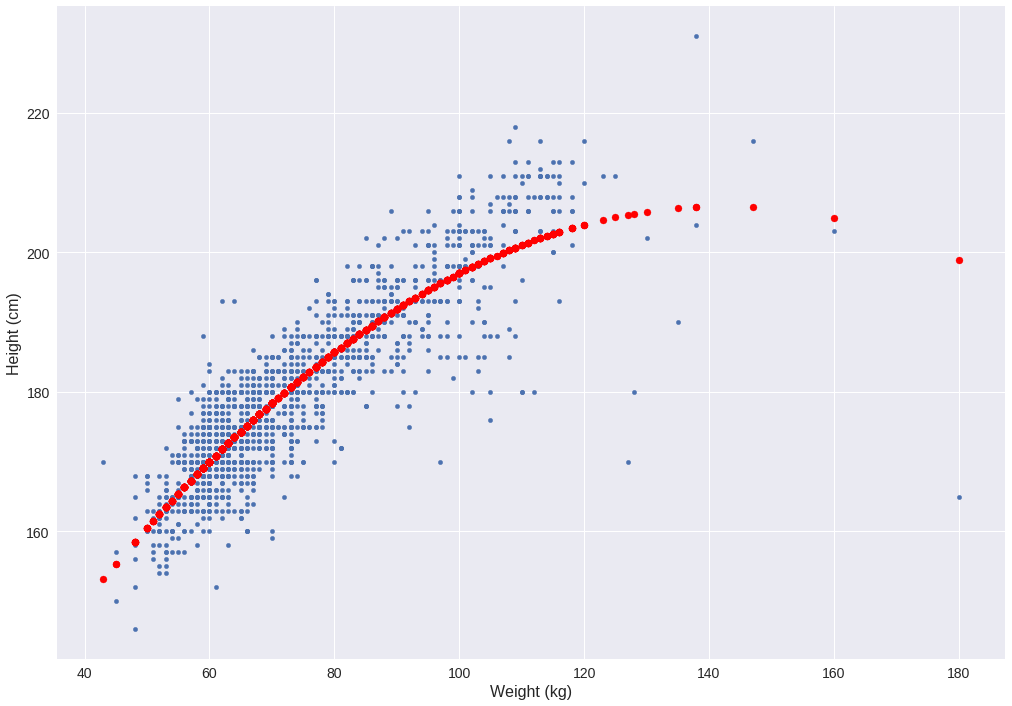

In [0]:
# plot
athletes.plot(kind="scatter", x="Weight (kg)", y="Height (cm)", figsize=(17,12))
plt.scatter(athletes["Weight (kg)"].values.reshape(-1,1), athletes_height_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes["Height (cm)"].values.reshape(-1,1), athletes_height_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

Male tennis players

RMSE: 253.58


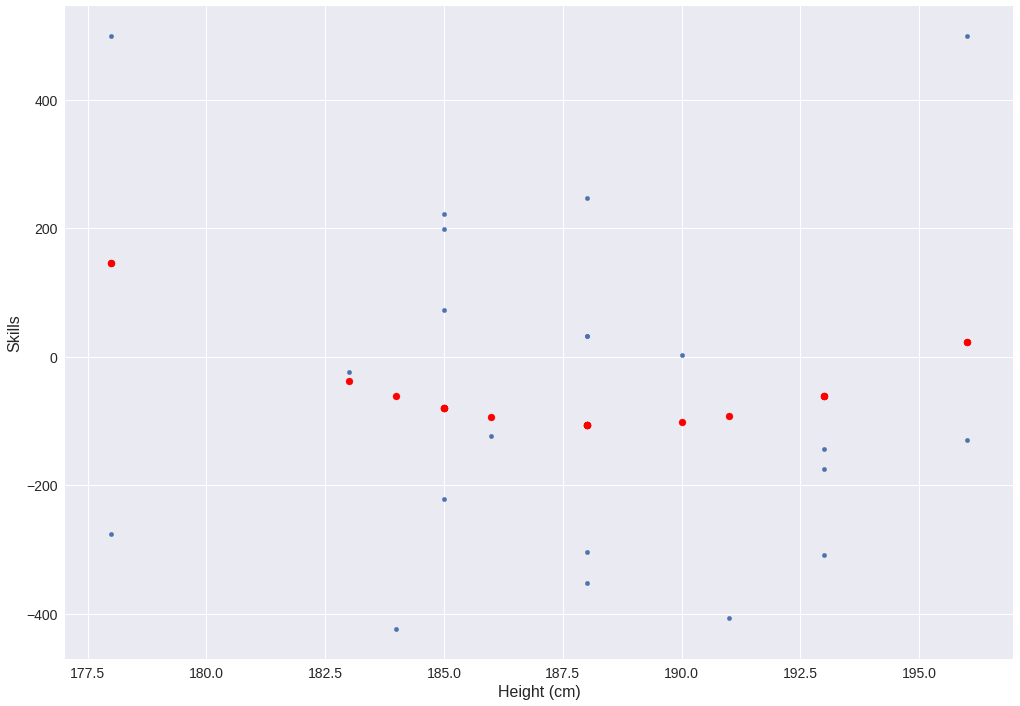

In [0]:
#Male tennis players

athletes_tennis = athletes.loc[athletes['Sport'] == "Tennis"]
athletes_tennis = athletes_tennis.loc[athletes_tennis['Gender'] == "Male"]

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes_tennis.sort_values(by=['Skills'])
athletes_tennis_poly = poly_features.fit_transform(athletes_tennis["Height (cm)"].values.reshape(-1,1))
athletes_tennis_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(athletes_tennis_poly, athletes_tennis["Skills"])
#prediction
athletes_tennis_skills_pred = lin_reg.predict(athletes_tennis_poly)

athletes_tennis.plot(kind="scatter", x='Height (cm)', y="Skills", figsize=(17,12))
plt.scatter(athletes_tennis['Height (cm)'].values.reshape(-1,1), athletes_tennis_skills_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes_tennis["Skills"].values.reshape(-1,1), athletes_tennis_skills_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

Female tennis players

RMSE: 1000.54


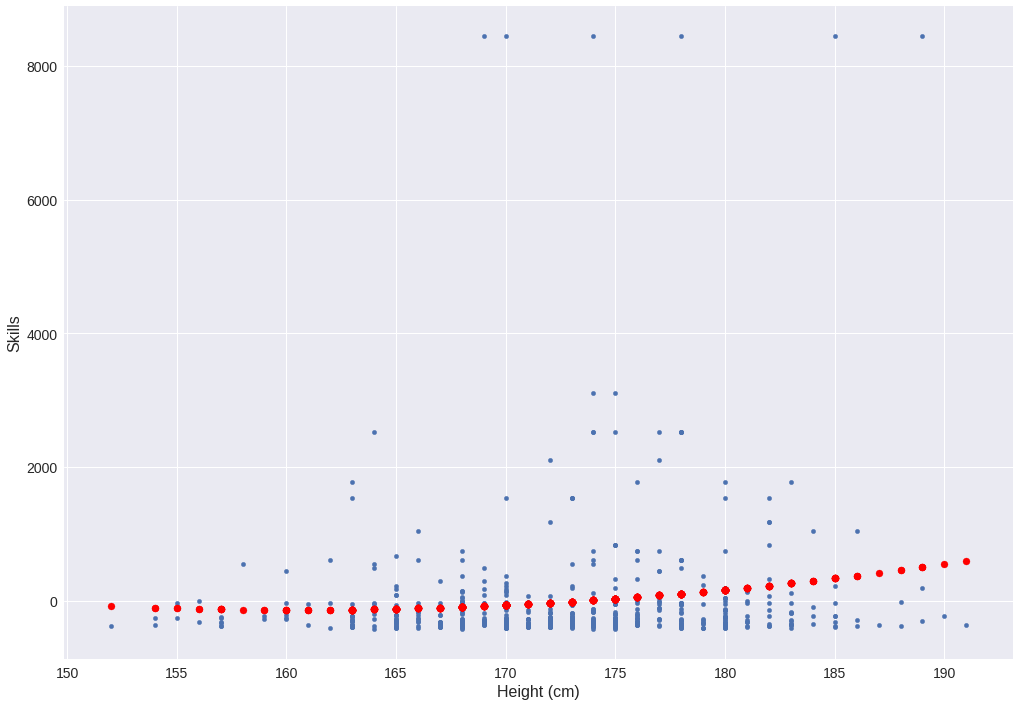

In [0]:
#Female tennis players

athletes_tennis = athletes.loc[athletes['Sport'] == "Tennis"]
athletes_tennis = athletes_tennis.loc[athletes_tennis['Gender'] == "Female"]

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes_tennis.sort_values(by=['Skills'])
athletes_tennis_poly = poly_features.fit_transform(athletes_tennis["Height (cm)"].values.reshape(-1,1))
athletes_tennis_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(athletes_tennis_poly, athletes_tennis["Skills"])
#prediction
athletes_tennis_skills_pred = lin_reg.predict(athletes_tennis_poly)

athletes_tennis.plot(kind="scatter", x='Height (cm)', y="Skills", figsize=(17,12))
plt.scatter(athletes_tennis['Height (cm)'].values.reshape(-1,1), athletes_tennis_skills_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes_tennis["Skills"].values.reshape(-1,1), athletes_tennis_skills_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

RMSE: 1017.17


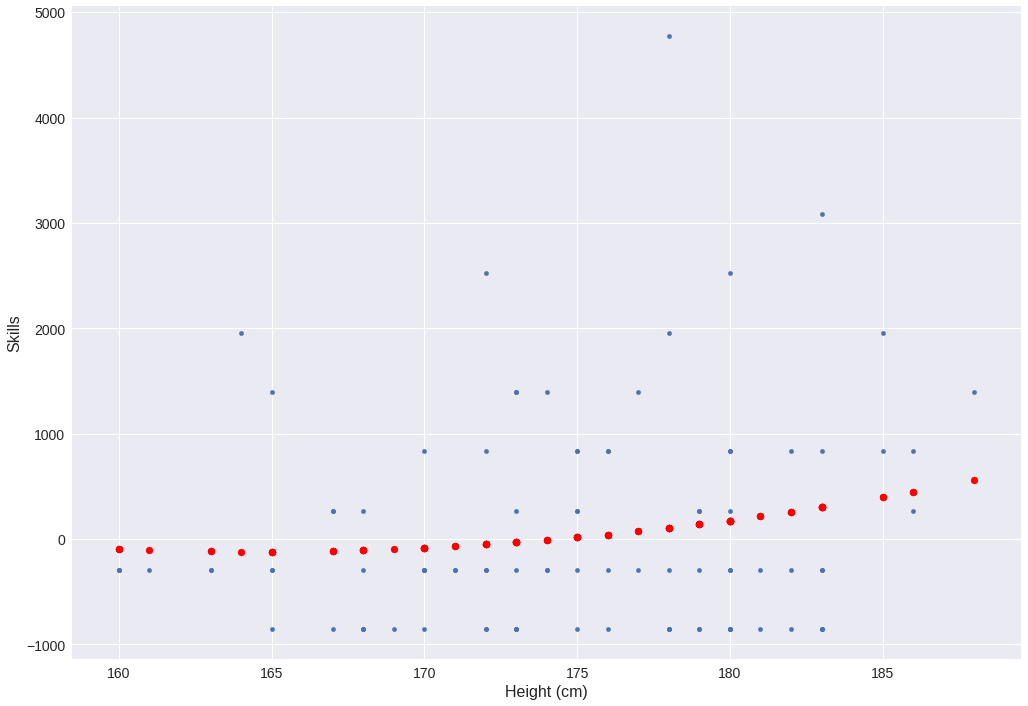

In [0]:
#Female swimmers

athletes_swimmer = athletes.loc[athletes['Sport'] == "Swimming"]
athletes_swimmer = athletes_swimmer.loc[athletes_swimmer['Gender'] == "Female"]

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes_swimmer.sort_values(by=['Skills'])
athletes_swimmer_poly = poly_features.fit_transform(athletes_swimmer["Height (cm)"].values.reshape(-1,1))
athletes_swimmer_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(athletes_swimmer_poly, athletes_swimmer["Skills"])

#prediction
athletes_swimmer_skills_pred = lin_reg.predict(athletes_swimmer_poly)

athletes_swimmer.plot(kind="scatter", x='Height (cm)', y="Skills", figsize=(17,12))
plt.scatter(athletes_swimmer['Height (cm)'].values.reshape(-1,1), athletes_swimmer_skills_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes_swimmer["Skills"].values.reshape(-1,1), athletes_swimmer_skills_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

RMSE: 940.49


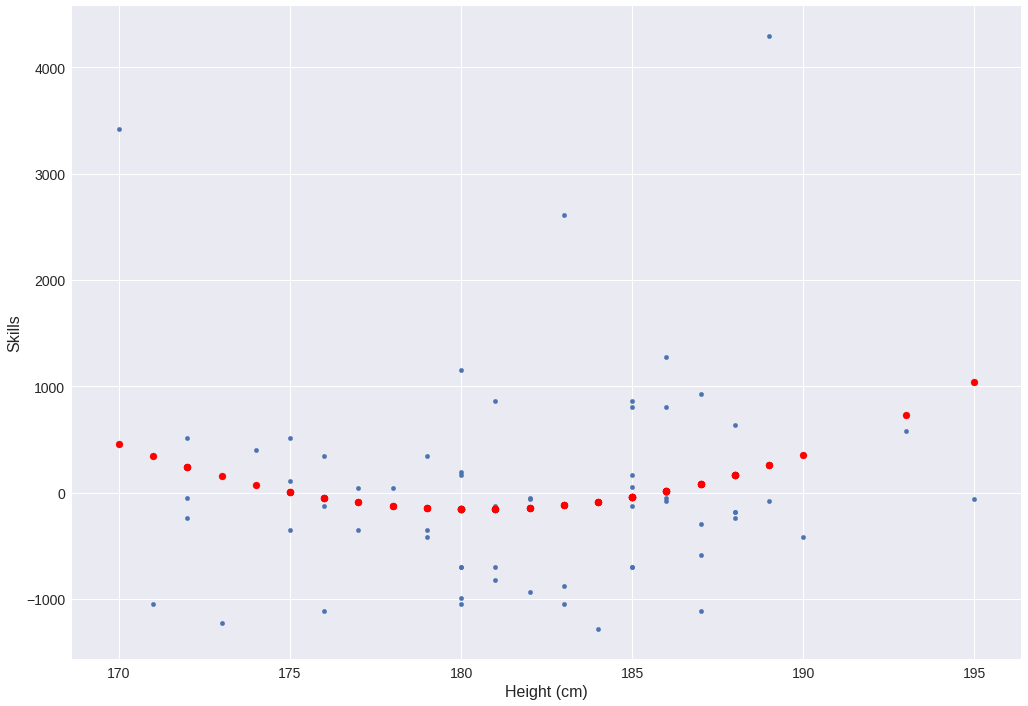

In [0]:
#Male footballers

athletes_footballer = athletes.loc[athletes['Sport'] == "Football"]
athletes_footballer = athletes_footballer.loc[athletes_footballer['Gender'] == "Male"]

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes_footballer.sort_values(by=['Skills'])
athletes_footballer_poly = poly_features.fit_transform(athletes_footballer["Height (cm)"].values.reshape(-1,1))
athletes_footballer_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(athletes_footballer_poly, athletes_footballer["Skills"])

#prediction
athletes_footballer_skills_pred = lin_reg.predict(athletes_footballer_poly)

athletes_footballer.plot(kind="scatter", x='Height (cm)', y="Skills", figsize=(17,12))
plt.scatter(athletes_footballer['Height (cm)'].values.reshape(-1,1), athletes_footballer_skills_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes_footballer["Skills"].values.reshape(-1,1), athletes_footballer_skills_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

RMSE: 812.13


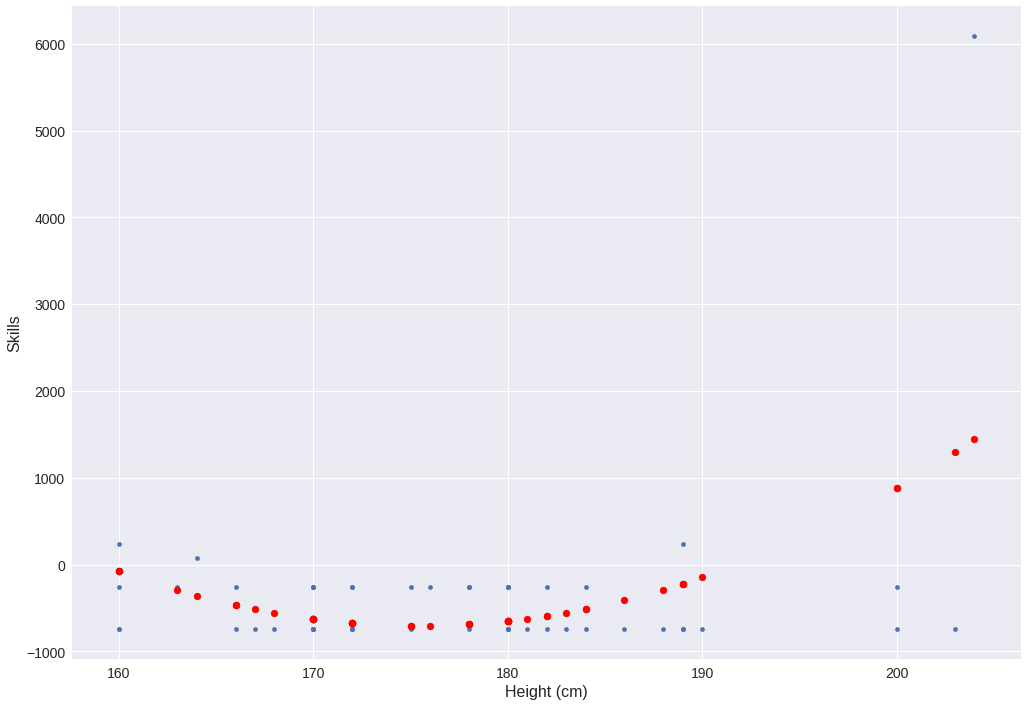

In [0]:
#Male footballers

athletes_footballer = athletes.loc[athletes['Sport'] == "Judo"]
athletes_footballer = athletes_footballer.loc[athletes_footballer['Gender'] == "Male"]

# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
athletes_footballer.sort_values(by=['Skills'])
athletes_footballer_poly = poly_features.fit_transform(athletes_footballer["Height (cm)"].values.reshape(-1,1))
athletes_footballer_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(athletes_footballer_poly, athletes_footballer["Skills"])

#prediction
athletes_footballer_skills_pred = lin_reg.predict(athletes_footballer_poly)

athletes_footballer.plot(kind="scatter", x='Height (cm)', y="Skills", figsize=(17,12))
plt.scatter(athletes_footballer['Height (cm)'].values.reshape(-1,1), athletes_footballer_skills_pred, color='red')
# mse
lin_mse = mean_squared_error(athletes_footballer["Skills"].values.reshape(-1,1), athletes_footballer_skills_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

### Some additional ideas for regression:

In [0]:
athletes_sport_encoded, athletes_sport = athletes["Gender"].factorize()
athletes['Gender_num']=athletes_sport_encoded



In [0]:
athletes_sport_encoded, athletes_sport = athletes["Nationality"].factorize()
athletes['Nationality_num']=athletes_sport_encoded


In [0]:
athletes_sport_encoded, athletes_sport = athletes["Sport"].factorize()
athletes['Sport_num']=athletes_sport_encoded

#female = 0; male = 1
#Tennis = 0; Judo = 1; Basketball = 2; Swimming = 3; Football = 4; GOlf = 5; Equestrian = 6; Baseball = 7; Table-Tennis = 8;  Cycling = 9;


In [0]:
from sklearn import linear_model
import statsmodels.api as sm



X = athletes[['Height (cm)','Weight (kg)','Gender_num', 'Sport_num' ]]
Y = athletes['Skills']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)



# prediction with sklearn
Height = 210
Weight = 100
Gender = 1
Sport = 2


print ('Playing a particular sport, my skill-level could be', regr.predict([[Height , Weight, Gender, Sport]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Playing a particular sport, my skill-level could be [78.52416797]
                            OLS Regression Results                            
Dep. Variable:                 Skills   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.764
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           2.15e-05
Time:                        21:07:33   Log-Likelihood:                -12259.
No. Observations:                1480   AIC:                         2.453e+04
Df Residuals:                    1475   BIC:                         2.455e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [0]:
''